In [30]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns

In [31]:
dataFrame = pd.read_csv('dataset.csv')

In [32]:
dataFrame.isnull().values.any()

False

In [ ]:
fraudsOut = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='CASH_OUT'])
fraudsIn = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='CASH_IN'])
fraudsPayment = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='PAYMENT'])
fraudsTransfer = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='TRANSFER'])
fraudsDebit = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='DEBIT'])

plt.figure(figsize=[10,10])
numberOfFrauds = [fraudsOut, fraudsIn, fraudsPayment,fraudsTransfer, fraudsDebit ]
tick_label = ['CASH_OUT','CASH_IN','PAYMENT','TRANSFER','DEBIT']
plt.bar(tick_label,numberOfFrauds)
plt.xlabel("Type")
plt.ylabel("No.of Frauds")
plt.show()

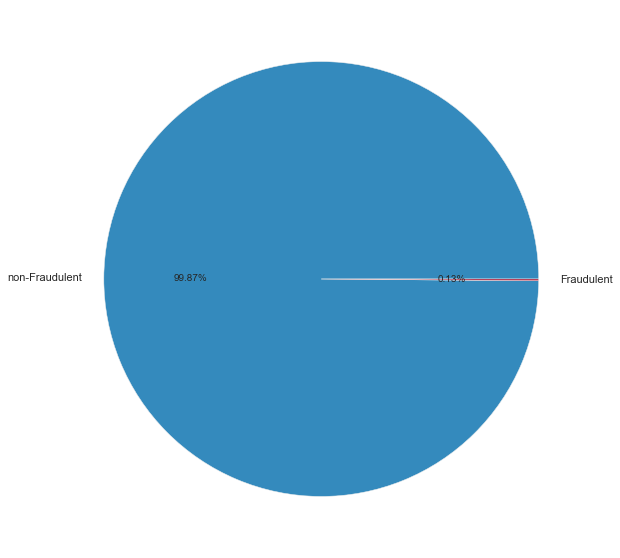

In [34]:
plt.style.use("bmh")
fraud = len(dataFrame[(dataFrame['isFraud']==1)])
nonFraud = len(dataFrame) - fraud
# print("{:.3f}".format((fraud/(nonFraud+fraud)) * 100))
# print(nonFraud)

plt.pie([nonFraud, fraud], labels=['non-Fraudulent', 'Fraudulent'], autopct='%0.2f%%')
plt.show()

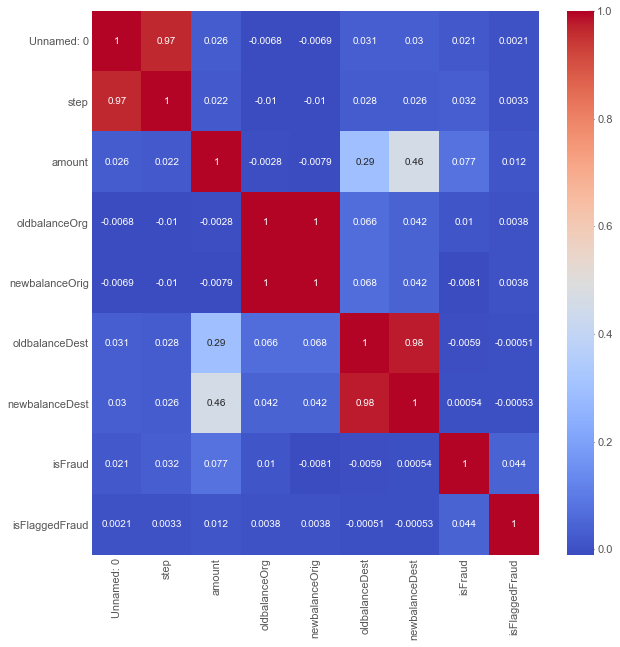

In [35]:
dataFrame.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dataFrame.corr(), annot=True, cmap='coolwarm')

One popular trend is fraud attacks by big criminals happen in a short period of time. To check this, we can plot the fraud attacks with time. In our data, we have data every hour. 
The below graph shows the fraud attack every hour in the 744 hours. As expected there are peaks and troughs and also a very big peak. This suggests that frauds happen in short period of time.

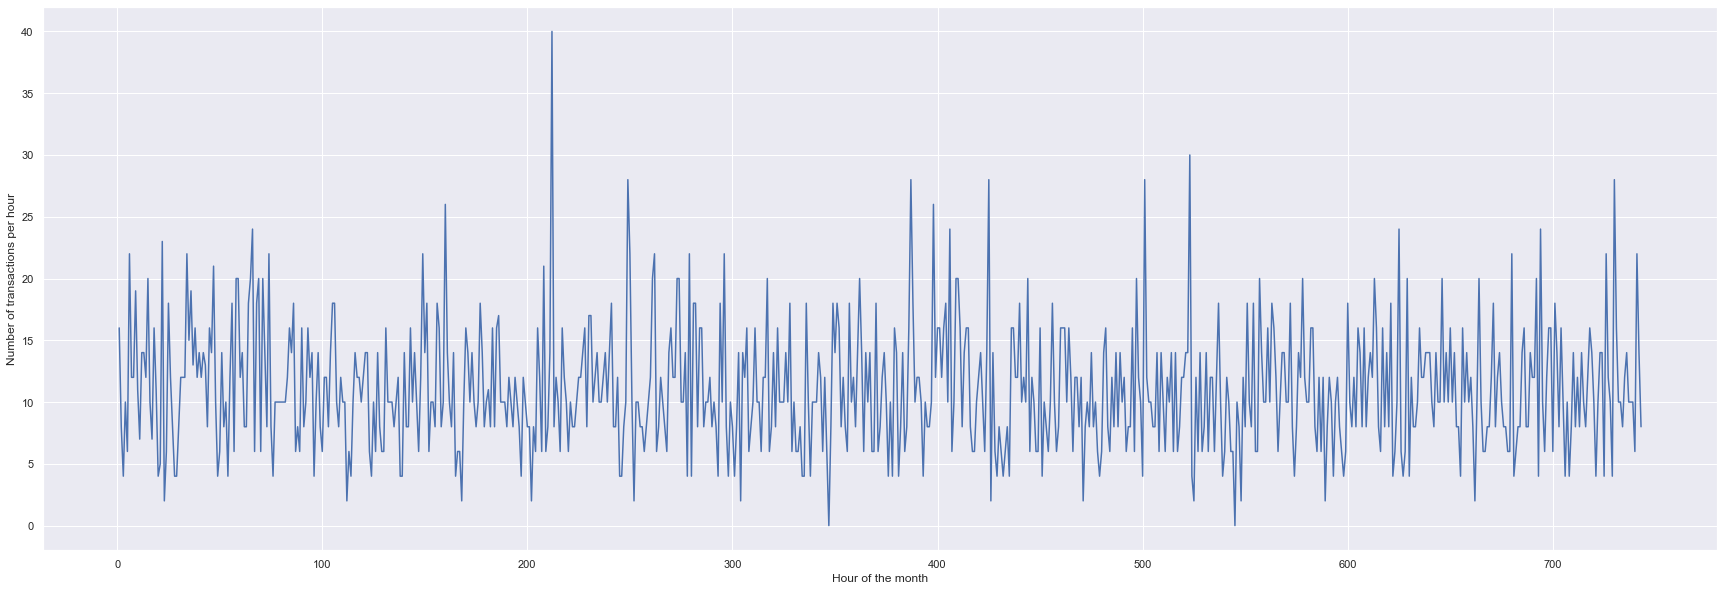

In [36]:
sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(x=list(range(1,744)),y=dataFrame.groupby("step")["isFraud"].sum())
plt.xlabel("Hour of the month")
plt.ylabel("Number of transactions per hour")
plt.show()

Another analysis that can be interesting is at which hour of a day, the fraud attacks generally happen. From the step variable, we can get the hour of day. The below plot shows the frauds at different hours of day. It tells that frauds happen during sleeping hours the most. Close to 20% of transactions that happen during 4 AM and 5 AM are fraud transactions.
Please note that "step" is basically number of hours. we have maximum enteries of 744 hours.

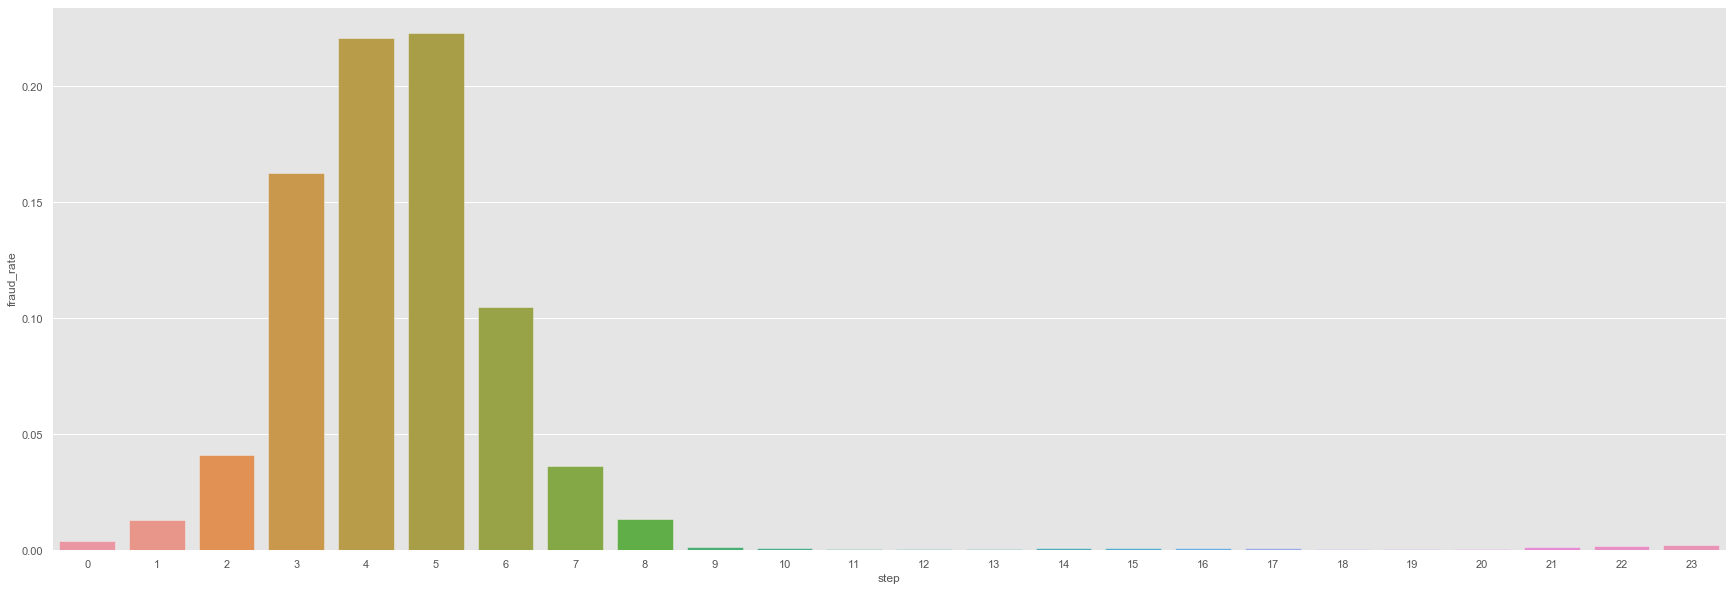

In [50]:
plt.style.use("ggplot")
dataFrame["step"] = dataFrame.step % 24
frauds_hour = pd.concat([dataFrame.groupby("step")["isFraud"].sum(),dataFrame.groupby("step")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
#sns.catplot(x=frauds_hour.index, y=frauds_hour.fraud_rate, data=dataFrame)

plt.show()

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


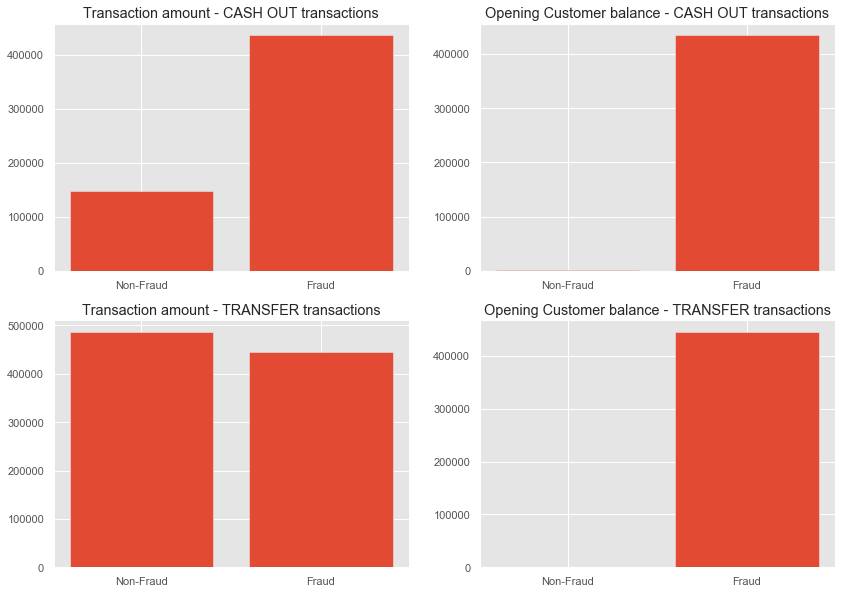

In [49]:
fig,ax=plt.subplots(2,2,figsize=(14,10))

ax[0][0].title.set_text("Transaction amount - CASH OUT transactions")
ax[0][0].bar(x=["Non-Fraud","Fraud"],height=dataFrame[dataFrame.type=="CASH_OUT"].groupby("isFraud")["amount"].median())
ax[0][1].title.set_text("Opening Customer balance - CASH OUT transactions")
ax[0][1].bar(x=["Non-Fraud","Fraud"],height=dataFrame[dataFrame.type=="CASH_OUT"].groupby("isFraud")["oldbalanceOrg"].median())
ax[1][0].title.set_text("Transaction amount - TRANSFER transactions")
ax[1][0].bar(x=["Non-Fraud","Fraud"],height=dataFrame[dataFrame.type=="TRANSFER"].groupby("isFraud")["amount"].median())
ax[1][1].title.set_text("Opening Customer balance - TRANSFER transactions")
ax[1][1].bar(x=["Non-Fraud","Fraud"],height=dataFrame[dataFrame.type=="TRANSFER"].groupby("isFraud")["oldbalanceOrg"].median())
fig.show()